In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [92]:
df = pd.read_csv(r"C:\Users\fabi_\OneDrive\Estudos e Cursos\Data analytics\Ironhack\Statistics_EDA_ML\lab-unsupervised-learning-intro\spotify.csv")
df = df.drop(['Unnamed: 0'], axis = 1)

df.dtypes

name                 object
album                object
artist               object
release_date         object
length                int64
popularity            int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object

In [93]:
# Define a function to extract the year from the date string
def extract_year(date_str):
    if pd.isna(date_str):
        return np.nan
    # Use regular expression to find the year (4 digits starting with 2)
    match = re.search(r'\b2\d{3}\b', date_str)
    return int(match.group(0)) if match else np.nan

# Apply the function to the release_date column
df['year'] = df['release_date'].apply(extract_year)
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year
0,I Wanna Be Yours,AM,Arctic Monkeys,2013-09-09,183956,91,0.136000,0.464,0.417,0.022000,0.0974,-9.345,0.0256,67.528,4,2013
1,The Scientist,A Rush of Blood to the Head,Coldplay,2002-08-27,309600,86,0.731000,0.557,0.442,0.000015,0.1100,-7.224,0.0243,146.277,4,2002
2,Unwritten,Unwritten,Natasha Bedingfield,2004-08-30,259333,88,0.005840,0.706,0.800,0.000000,0.0822,-6.333,0.0399,100.011,4,2004
3,Without Me,The Eminem Show,Eminem,2002-05-26,290320,88,0.002860,0.908,0.669,0.000000,0.2370,-2.827,0.0738,112.238,4,2002
4,Hips Don't Lie (feat. Wyclef Jean),"Oral Fixation, Vol. 2 (Expanded Edition)",Shakira,2005-11-28,218093,87,0.284000,0.778,0.824,0.000000,0.4050,-5.892,0.0707,100.024,4,2005
5,In the End,Hybrid Theory (Bonus Edition),Linkin Park,2000,216880,87,0.009580,0.556,0.864,0.000000,0.2090,-5.870,0.0584,105.143,4,2000
6,Yellow,Parachutes,Coldplay,2000-07-10,266773,89,0.002390,0.429,0.661,0.000121,0.2340,-7.227,0.0281,173.372,4,2000
7,Mr. Brightside,Hot Fuss,The Killers,2004,222973,87,0.001210,0.352,0.911,0.000000,0.0995,-5.230,0.0747,148.033,4,2004
8,Mockingbird,Encore (Deluxe Version),Eminem,2004-11-12,250760,86,0.209000,0.637,0.678,0.000000,0.1560,-3.798,0.2660,84.039,4,2004
9,"Hey, Soul Sister","Save Me, San Francisco (Golden Gate Edition)",Train,2010-12-01,216773,85,0.185000,0.673,0.886,0.000000,0.0826,-4.440,0.0431,97.012,4,2010


In [94]:
metrics = df.select_dtypes(include = [np.number])
metrics

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year
0,183956,91,0.136000,0.464,0.417,0.022000,0.0974,-9.345,0.0256,67.528,4,2013
1,309600,86,0.731000,0.557,0.442,0.000015,0.1100,-7.224,0.0243,146.277,4,2002
2,259333,88,0.005840,0.706,0.800,0.000000,0.0822,-6.333,0.0399,100.011,4,2004
3,290320,88,0.002860,0.908,0.669,0.000000,0.2370,-2.827,0.0738,112.238,4,2002
4,218093,87,0.284000,0.778,0.824,0.000000,0.4050,-5.892,0.0707,100.024,4,2005
5,216880,87,0.009580,0.556,0.864,0.000000,0.2090,-5.870,0.0584,105.143,4,2000
6,266773,89,0.002390,0.429,0.661,0.000121,0.2340,-7.227,0.0281,173.372,4,2000
7,222973,87,0.001210,0.352,0.911,0.000000,0.0995,-5.230,0.0747,148.033,4,2004
8,250760,86,0.209000,0.637,0.678,0.000000,0.1560,-3.798,0.2660,84.039,4,2004
9,216773,85,0.185000,0.673,0.886,0.000000,0.0826,-4.440,0.0431,97.012,4,2010


### Clustering - K-means

In [95]:
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

kmeans3 = cluster.KMeans(n_clusters=3)
kmeans3.fit(metrics)
pred3 = kmeans3.predict(metrics)

In [96]:
pred3

array([0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1,
       0, 2, 2, 0, 2, 1])

In [97]:
df['cluster3']=pred3
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year,cluster3
0,I Wanna Be Yours,AM,Arctic Monkeys,2013-09-09,183956,91,0.136000,0.464,0.417,0.022000,0.0974,-9.345,0.0256,67.528,4,2013,0
1,The Scientist,A Rush of Blood to the Head,Coldplay,2002-08-27,309600,86,0.731000,0.557,0.442,0.000015,0.1100,-7.224,0.0243,146.277,4,2002,1
2,Unwritten,Unwritten,Natasha Bedingfield,2004-08-30,259333,88,0.005840,0.706,0.800,0.000000,0.0822,-6.333,0.0399,100.011,4,2004,2
3,Without Me,The Eminem Show,Eminem,2002-05-26,290320,88,0.002860,0.908,0.669,0.000000,0.2370,-2.827,0.0738,112.238,4,2002,1
4,Hips Don't Lie (feat. Wyclef Jean),"Oral Fixation, Vol. 2 (Expanded Edition)",Shakira,2005-11-28,218093,87,0.284000,0.778,0.824,0.000000,0.4050,-5.892,0.0707,100.024,4,2005,0
5,In the End,Hybrid Theory (Bonus Edition),Linkin Park,2000,216880,87,0.009580,0.556,0.864,0.000000,0.2090,-5.870,0.0584,105.143,4,2000,0
6,Yellow,Parachutes,Coldplay,2000-07-10,266773,89,0.002390,0.429,0.661,0.000121,0.2340,-7.227,0.0281,173.372,4,2000,1
7,Mr. Brightside,Hot Fuss,The Killers,2004,222973,87,0.001210,0.352,0.911,0.000000,0.0995,-5.230,0.0747,148.033,4,2004,2
8,Mockingbird,Encore (Deluxe Version),Eminem,2004-11-12,250760,86,0.209000,0.637,0.678,0.000000,0.1560,-3.798,0.2660,84.039,4,2004,2
9,"Hey, Soul Sister","Save Me, San Francisco (Golden Gate Edition)",Train,2010-12-01,216773,85,0.185000,0.673,0.886,0.000000,0.0826,-4.440,0.0431,97.012,4,2010,0


In [98]:
df.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature',
       'year', 'cluster3'],
      dtype='object')

In [99]:
cluster_0 = df[df['cluster3']==0]
cluster_0

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year,cluster3
0,I Wanna Be Yours,AM,Arctic Monkeys,2013-09-09,183956,91,0.13600,0.464,0.417,0.022000,0.0974,-9.345,0.0256,67.528,4,2013,0
4,Hips Don't Lie (feat. Wyclef Jean),"Oral Fixation, Vol. 2 (Expanded Edition)",Shakira,2005-11-28,218093,87,0.28400,0.778,0.824,0.000000,0.4050,-5.892,0.0707,100.024,4,2005,0
5,In the End,Hybrid Theory (Bonus Edition),Linkin Park,2000,216880,87,0.00958,0.556,0.864,0.000000,0.2090,-5.870,0.0584,105.143,4,2000,0
9,"Hey, Soul Sister","Save Me, San Francisco (Golden Gate Edition)",Train,2010-12-01,216773,85,0.18500,0.673,0.886,0.000000,0.0826,-4.440,0.0431,97.012,4,2010,0
16,Numb,Meteora,Linkin Park,2003-09-16,187520,85,0.00353,0.488,0.870,0.000000,0.4840,-4.185,0.0421,110.072,4,2003,0
17,Toxic,In The Zone,Britney Spears,2003-11-13,198800,85,0.02490,0.774,0.838,0.025000,0.2420,-3.914,0.1140,143.040,4,2003,0
18,Smack That,Konvicted,Akon,2006-01-01,212360,84,0.32300,0.939,0.741,0.000000,0.1070,-5.171,0.0471,118.978,4,2006,0
19,Sex on Fire,Only By The Night,Kings of Leon,2008-09-23,203346,84,0.00172,0.542,0.905,0.010400,0.1360,-5.653,0.0540,153.398,4,2008,0
21,Heartless,808s & Heartbreak,Kanye West,2008-11-24,211000,84,0.05150,0.790,0.647,0.000000,0.2480,-5.983,0.1360,87.999,4,2008,0
23,TiK ToK,Animal (Expanded Edition),Kesha,2010-01-01,199693,84,0.09910,0.755,0.837,0.000000,0.2890,-2.718,0.1420,120.028,4,2010,0


In [100]:
cluster_1 = df[df['cluster3']==1]
cluster_1

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year,cluster3
1,The Scientist,A Rush of Blood to the Head,Coldplay,2002-08-27,309600,86,0.73100,0.557,0.442,0.000015,0.1100,-7.224,0.0243,146.277,4,2002,1
3,Without Me,The Eminem Show,Eminem,2002-05-26,290320,88,0.00286,0.908,0.669,0.000000,0.2370,-2.827,0.0738,112.238,4,2002,1
6,Yellow,Parachutes,Coldplay,2000-07-10,266773,89,0.00239,0.429,0.661,0.000121,0.2340,-7.227,0.0281,173.372,4,2000,1
13,The Real Slim Shady,The Marshall Mathers LP,Eminem,2000-05-23,284200,86,0.03020,0.949,0.661,0.000000,0.0454,-4.244,0.0572,104.504,4,2000,1
20,Can't Stop,By the Way (Deluxe Edition),Red Hot Chili Peppers,2002-07-09,269000,84,0.01790,0.618,0.938,0.000000,0.1670,-3.442,0.0456,91.455,4,2002,1
24,Till I Collapse,The Eminem Show,Eminem,2002-05-26,297786,84,0.06220,0.548,0.847,0.000000,0.0816,-3.237,0.1860,171.447,4,2002,1
31,Ms. Jackson,Stankonia,Outkast,2000-10-31,270506,83,0.14300,0.843,0.806,0.000000,0.0771,-5.946,0.2690,94.948,4,2000,1
33,Bad Romance,The Fame Monster (Deluxe Edition),Lady Gaga,2009-11-05,294573,82,0.00314,0.695,0.921,0.000053,0.0842,-3.752,0.0363,119.007,4,2009,1
35,Fix You,X&Y,Coldplay,2005-06-07,295533,82,0.16400,0.209,0.417,0.001960,0.1130,-8.740,0.0338,138.178,4,2005,1
43,Superman,The Eminem Show,Eminem,2002-05-26,350320,82,0.02150,0.802,0.755,0.000000,0.2950,-3.138,0.0564,130.027,4,2002,1


In [101]:
cluster_2 = df[df['cluster3']==2]
cluster_2

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year,cluster3
2,Unwritten,Unwritten,Natasha Bedingfield,2004-08-30,259333,88,0.005840,0.706,0.800,0.000000,0.0822,-6.333,0.0399,100.011,4,2004,2
7,Mr. Brightside,Hot Fuss,The Killers,2004,222973,87,0.001210,0.352,0.911,0.000000,0.0995,-5.230,0.0747,148.033,4,2004,2
8,Mockingbird,Encore (Deluxe Version),Eminem,2004-11-12,250760,86,0.209000,0.637,0.678,0.000000,0.1560,-3.798,0.2660,84.039,4,2004,2
10,Seven Nation Army,Elephant,The White Stripes,2003-04-01,232106,85,0.003900,0.743,0.446,0.118000,0.3370,-7.807,0.0683,123.596,4,2003,2
11,Viva La Vida,Viva La Vida or Death and All His Friends,Coldplay,2008-05-26,242373,87,0.095400,0.486,0.617,0.000003,0.1090,-7.115,0.0287,138.015,4,2008,2
12,How You Remind Me,Silver Side Up,Nickelback,2001-09-11,223840,85,0.001350,0.446,0.764,0.000000,0.0990,-5.042,0.0330,172.094,4,2001,2
14,Yeah! (feat. Lil Jon & Ludacris),Confessions (Expanded Edition),USHER,2004-03-23,250373,85,0.018300,0.894,0.791,0.000000,0.0388,-4.699,0.1120,105.018,4,2004,2
15,Feel Good Inc.,Demon Days,Gorillaz,2005-05-23,222640,85,0.008360,0.818,0.705,0.002330,0.6130,-6.679,0.1770,138.559,4,2005,2
22,Sparks,Parachutes,Coldplay,2000-07-10,227093,84,0.748000,0.371,0.268,0.051700,0.1040,-10.506,0.0281,102.617,3,2000,2
25,Hey Ya!,Speakerboxxx/The Love Below,Outkast,2003,235213,83,0.103000,0.727,0.974,0.000532,0.1740,-2.261,0.0664,79.526,4,2003,2


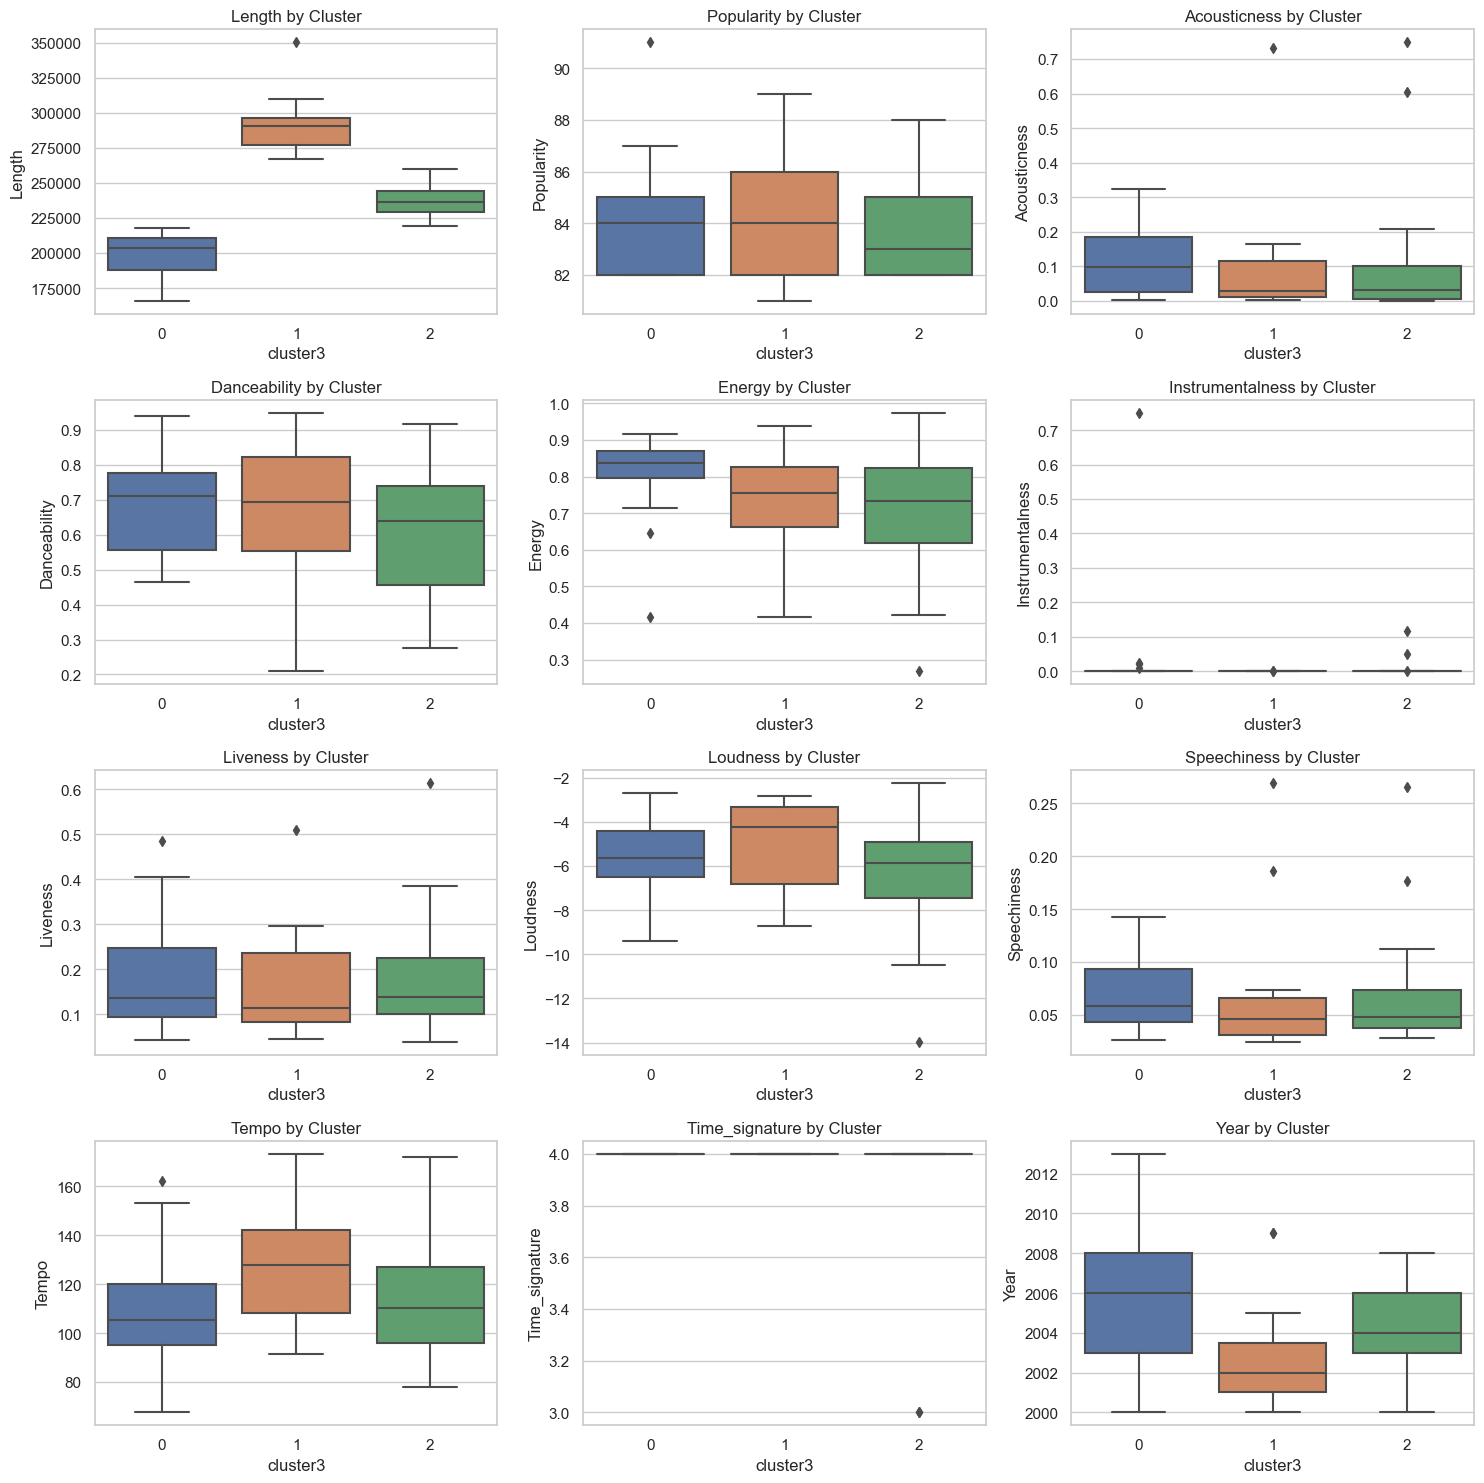

In [102]:
cluster_metrics = df[['length','popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','year']]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, metric in enumerate(cluster_metrics):
    # Create a boxplot for each metric
    sns.boxplot(x='cluster3', y=metric, data=df, ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} by Cluster')
    axes[i].set_ylabel(metric.capitalize())

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Improving K

In [89]:
kmeans.inertia_

78283415.11027291

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

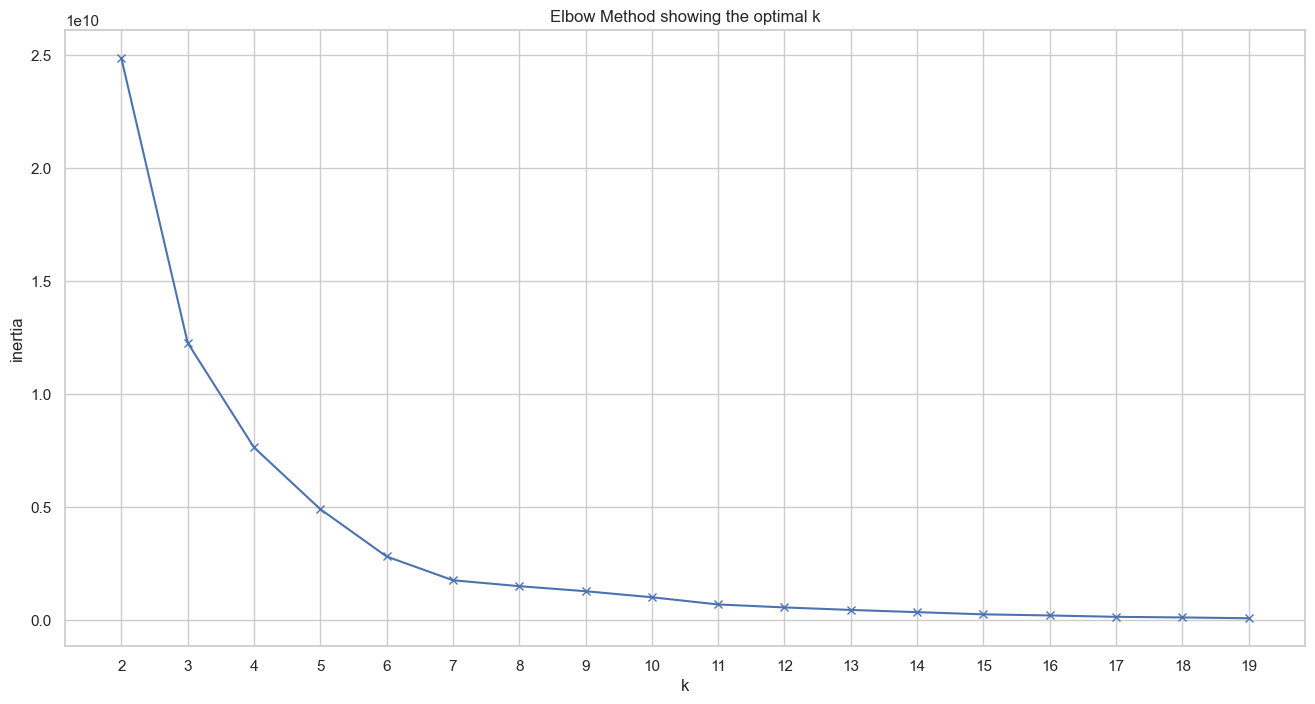

In [90]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
    kmeans.fit(metrics)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

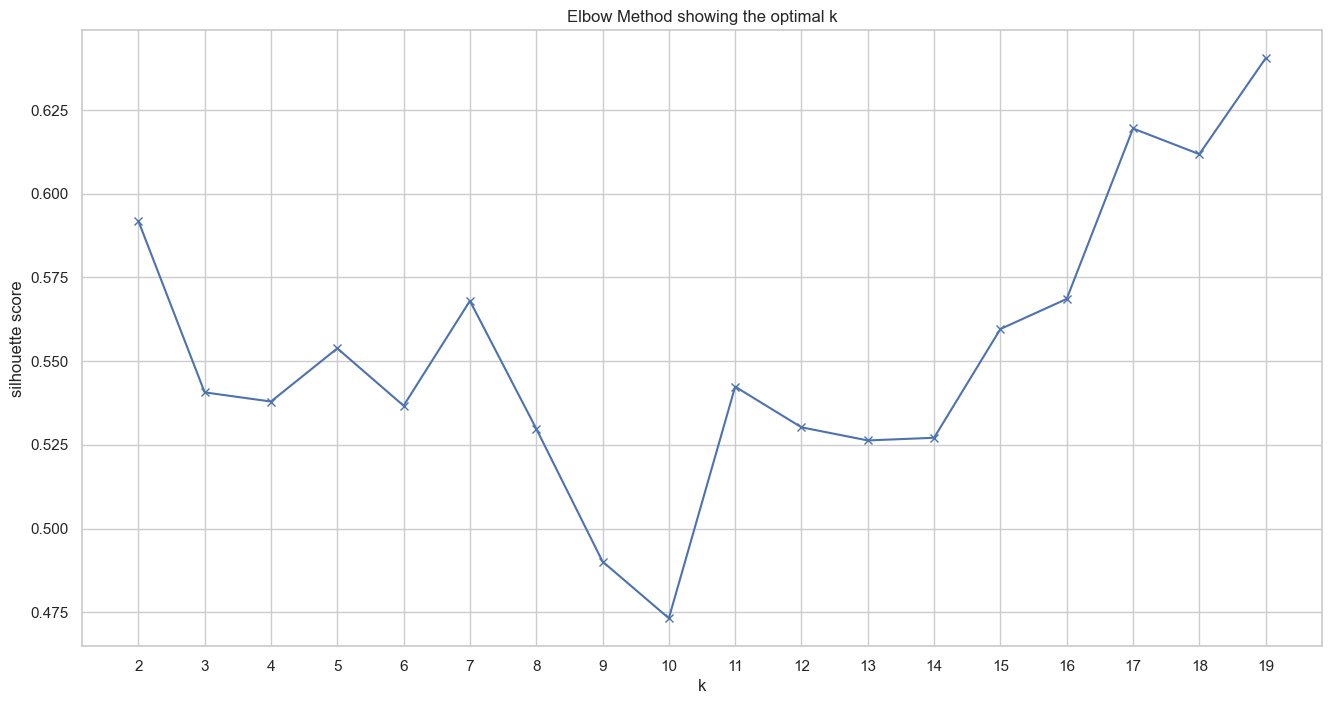

In [91]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
    kmeans.fit(metrics)
    silhouette.append(silhouette_score(metrics, kmeans.predict(metrics)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [104]:
# 7 ou 5

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

kmeans5 = cluster.KMeans(n_clusters=5)
kmeans5.fit(metrics)
pred5 = kmeans5.predict(metrics)

df['cluster5']=pred5
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year,cluster3,cluster5
0,I Wanna Be Yours,AM,Arctic Monkeys,2013-09-09,183956,91,0.136000,0.464,0.417,0.022000,0.0974,-9.345,0.0256,67.528,4,2013,0,1
1,The Scientist,A Rush of Blood to the Head,Coldplay,2002-08-27,309600,86,0.731000,0.557,0.442,0.000015,0.1100,-7.224,0.0243,146.277,4,2002,1,2
2,Unwritten,Unwritten,Natasha Bedingfield,2004-08-30,259333,88,0.005840,0.706,0.800,0.000000,0.0822,-6.333,0.0399,100.011,4,2004,2,0
3,Without Me,The Eminem Show,Eminem,2002-05-26,290320,88,0.002860,0.908,0.669,0.000000,0.2370,-2.827,0.0738,112.238,4,2002,1,2
4,Hips Don't Lie (feat. Wyclef Jean),"Oral Fixation, Vol. 2 (Expanded Edition)",Shakira,2005-11-28,218093,87,0.284000,0.778,0.824,0.000000,0.4050,-5.892,0.0707,100.024,4,2005,0,4
5,In the End,Hybrid Theory (Bonus Edition),Linkin Park,2000,216880,87,0.009580,0.556,0.864,0.000000,0.2090,-5.870,0.0584,105.143,4,2000,0,4
6,Yellow,Parachutes,Coldplay,2000-07-10,266773,89,0.002390,0.429,0.661,0.000121,0.2340,-7.227,0.0281,173.372,4,2000,1,0
7,Mr. Brightside,Hot Fuss,The Killers,2004,222973,87,0.001210,0.352,0.911,0.000000,0.0995,-5.230,0.0747,148.033,4,2004,2,4
8,Mockingbird,Encore (Deluxe Version),Eminem,2004-11-12,250760,86,0.209000,0.637,0.678,0.000000,0.1560,-3.798,0.2660,84.039,4,2004,2,0
9,"Hey, Soul Sister","Save Me, San Francisco (Golden Gate Edition)",Train,2010-12-01,216773,85,0.185000,0.673,0.886,0.000000,0.0826,-4.440,0.0431,97.012,4,2010,0,4


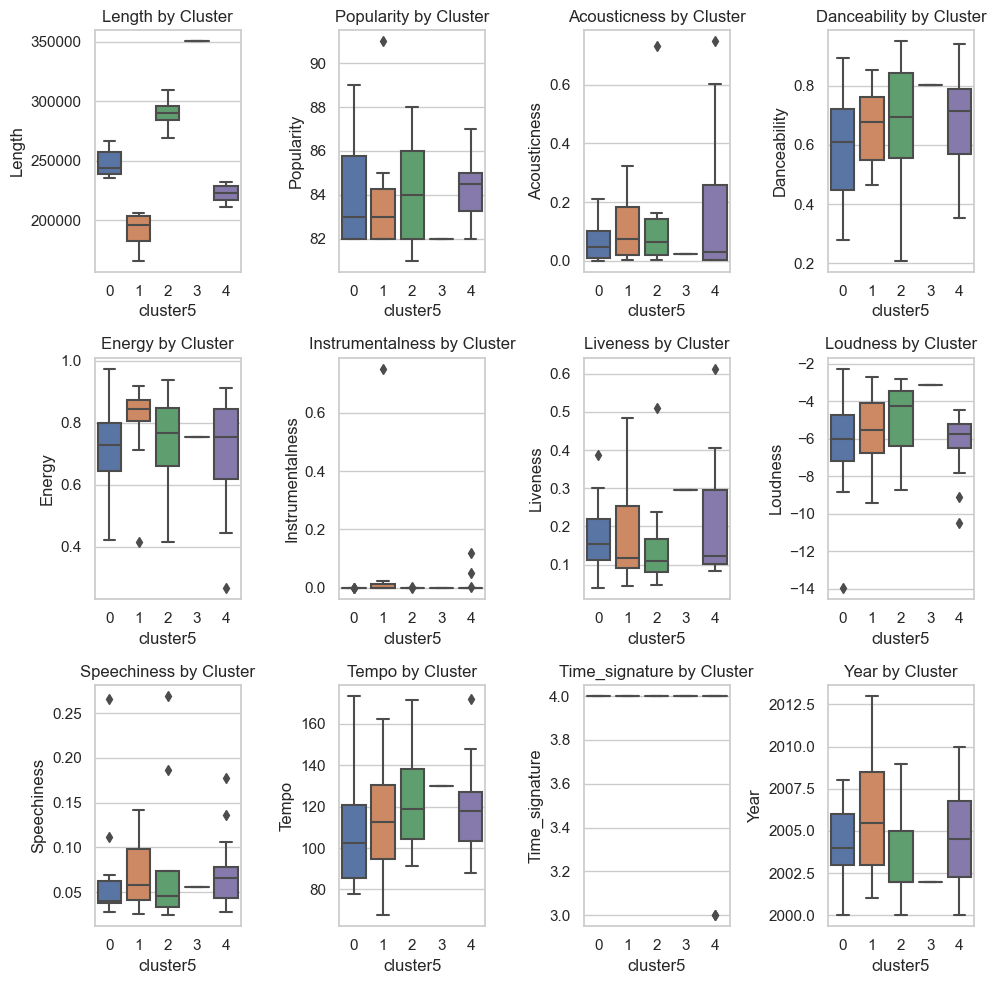

In [105]:
cluster_metrics = df[['length','popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','year']]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, metric in enumerate(cluster_metrics):
    # Create a boxplot for each metric
    sns.boxplot(x='cluster5', y=metric, data=df, ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} by Cluster')
    axes[i].set_ylabel(metric.capitalize())

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [106]:
cluster5_0= df[df['cluster5']==0]
cluster5_0

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year,cluster3,cluster5
2,Unwritten,Unwritten,Natasha Bedingfield,2004-08-30,259333,88,0.005840,0.706,0.800,0.000000,0.0822,-6.333,0.0399,100.011,4,2004,2,0
6,Yellow,Parachutes,Coldplay,2000-07-10,266773,89,0.002390,0.429,0.661,0.000121,0.2340,-7.227,0.0281,173.372,4,2000,1,0
8,Mockingbird,Encore (Deluxe Version),Eminem,2004-11-12,250760,86,0.209000,0.637,0.678,0.000000,0.1560,-3.798,0.2660,84.039,4,2004,2,0
11,Viva La Vida,Viva La Vida or Death and All His Friends,Coldplay,2008-05-26,242373,87,0.095400,0.486,0.617,0.000003,0.1090,-7.115,0.0287,138.015,4,2008,2,0
14,Yeah! (feat. Lil Jon & Ludacris),Confessions (Expanded Edition),USHER,2004-03-23,250373,85,0.018300,0.894,0.791,0.000000,0.0388,-4.699,0.1120,105.018,4,2004,2,0
25,Hey Ya!,Speakerboxxx/The Love Below,Outkast,2003,235213,83,0.103000,0.727,0.974,0.000532,0.1740,-2.261,0.0664,79.526,4,2003,2,0
26,Flashing Lights,Graduation,Kanye West,2007-09-11,237506,83,0.038100,0.639,0.628,0.000000,0.3860,-7.578,0.0398,90.482,4,2007,2,0
27,Bring Me To Life,Fallen,Evanescence,2003-03-04,235893,83,0.007210,0.331,0.943,0.000002,0.2420,-3.188,0.0698,94.612,4,2003,2,0
28,Promiscuous,Loose,Nelly Furtado,2006-01-01,242293,83,0.057300,0.808,0.970,0.000062,0.1540,-6.098,0.0504,114.328,4,2006,2,0
36,Back To Black,Back To Black (Deluxe Edition),Amy Winehouse,2006,241293,82,0.134000,0.434,0.422,0.000021,0.0861,-13.964,0.0375,123.201,4,2006,2,0


In [107]:
cluster5_1= df[df['cluster5']==1]
cluster5_1

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year,cluster3,cluster5
0,I Wanna Be Yours,AM,Arctic Monkeys,2013-09-09,183956,91,0.13600,0.464,0.417,0.022000,0.0974,-9.345,0.0256,67.528,4,2013,0,1
16,Numb,Meteora,Linkin Park,2003-09-16,187520,85,0.00353,0.488,0.870,0.000000,0.4840,-4.185,0.0421,110.072,4,2003,0,1
17,Toxic,In The Zone,Britney Spears,2003-11-13,198800,85,0.02490,0.774,0.838,0.025000,0.2420,-3.914,0.1140,143.040,4,2003,0,1
19,Sex on Fire,Only By The Night,Kings of Leon,2008-09-23,203346,84,0.00172,0.542,0.905,0.010400,0.1360,-5.653,0.0540,153.398,4,2008,0,1
23,TiK ToK,Animal (Expanded Edition),Kesha,2010-01-01,199693,84,0.09910,0.755,0.837,0.000000,0.2890,-2.718,0.1420,120.028,4,2010,0,1
30,Gasolina,Barrio Fino (Bonus Track Version),Daddy Yankee,2004-07-13,192600,83,0.32200,0.852,0.797,0.000003,0.0845,-6.543,0.0614,96.008,4,2004,0,1
32,This Love,Songs About Jane: 10th Anniversary Edition,Maroon 5,2002,206200,83,0.05250,0.712,0.862,0.000000,0.0930,-4.612,0.0378,95.051,4,2002,0,1
34,The Middle,Bleed American,Jimmy Eat World,2001-07-17,165853,82,0.03710,0.643,0.849,0.000000,0.0580,-5.428,0.0526,162.152,4,2001,0,1
39,The Way I Are,Shock Value,Timbaland,2007-01-01,179120,82,0.18100,0.729,0.807,0.750000,0.3190,-6.492,0.0936,114.742,4,2007,0,1
40,Dile,The Last Don,Don Omar,2003-01-01,204600,82,0.18600,0.822,0.713,0.000130,0.0431,-7.501,0.1220,94.034,4,2003,0,1


In [108]:
cluster5_2= df[df['cluster5']==2]
cluster5_2

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year,cluster3,cluster5
1,The Scientist,A Rush of Blood to the Head,Coldplay,2002-08-27,309600,86,0.73100,0.557,0.442,0.000015,0.1100,-7.224,0.0243,146.277,4,2002,1,2
3,Without Me,The Eminem Show,Eminem,2002-05-26,290320,88,0.00286,0.908,0.669,0.000000,0.2370,-2.827,0.0738,112.238,4,2002,1,2
13,The Real Slim Shady,The Marshall Mathers LP,Eminem,2000-05-23,284200,86,0.03020,0.949,0.661,0.000000,0.0454,-4.244,0.0572,104.504,4,2000,1,2
20,Can't Stop,By the Way (Deluxe Edition),Red Hot Chili Peppers,2002-07-09,269000,84,0.01790,0.618,0.938,0.000000,0.1670,-3.442,0.0456,91.455,4,2002,1,2
24,Till I Collapse,The Eminem Show,Eminem,2002-05-26,297786,84,0.06220,0.548,0.847,0.000000,0.0816,-3.237,0.1860,171.447,4,2002,1,2
31,Ms. Jackson,Stankonia,Outkast,2000-10-31,270506,83,0.14300,0.843,0.806,0.000000,0.0771,-5.946,0.2690,94.948,4,2000,1,2
33,Bad Romance,The Fame Monster (Deluxe Edition),Lady Gaga,2009-11-05,294573,82,0.00314,0.695,0.921,0.000053,0.0842,-3.752,0.0363,119.007,4,2009,1,2
35,Fix You,X&Y,Coldplay,2005-06-07,295533,82,0.16400,0.209,0.417,0.001960,0.1130,-8.740,0.0338,138.178,4,2005,1,2
49,I Gotta Feeling,THE E.N.D. (THE ENERGY NEVER DIES) [Deluxe Ver...,Black Eyed Peas,2009-01-01,289133,81,0.08730,0.744,0.766,0.000000,0.5090,-6.375,0.0265,127.966,4,2009,1,2


In [109]:
cluster5_3= df[df['cluster5']==3]
cluster5_3

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year,cluster3,cluster5
43,Superman,The Eminem Show,Eminem,2002-05-26,350320,82,0.0215,0.802,0.755,0.0,0.295,-3.138,0.0564,130.027,4,2002,1,3


In [110]:
cluster5_4= df[df['cluster5']==4]
cluster5_4

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,year,cluster3,cluster5
4,Hips Don't Lie (feat. Wyclef Jean),"Oral Fixation, Vol. 2 (Expanded Edition)",Shakira,2005-11-28,218093,87,0.28400,0.778,0.824,0.000000,0.4050,-5.892,0.0707,100.024,4,2005,0,4
5,In the End,Hybrid Theory (Bonus Edition),Linkin Park,2000,216880,87,0.00958,0.556,0.864,0.000000,0.2090,-5.870,0.0584,105.143,4,2000,0,4
7,Mr. Brightside,Hot Fuss,The Killers,2004,222973,87,0.00121,0.352,0.911,0.000000,0.0995,-5.230,0.0747,148.033,4,2004,2,4
9,"Hey, Soul Sister","Save Me, San Francisco (Golden Gate Edition)",Train,2010-12-01,216773,85,0.18500,0.673,0.886,0.000000,0.0826,-4.440,0.0431,97.012,4,2010,0,4
10,Seven Nation Army,Elephant,The White Stripes,2003-04-01,232106,85,0.00390,0.743,0.446,0.118000,0.3370,-7.807,0.0683,123.596,4,2003,2,4
12,How You Remind Me,Silver Side Up,Nickelback,2001-09-11,223840,85,0.00135,0.446,0.764,0.000000,0.0990,-5.042,0.0330,172.094,4,2001,2,4
15,Feel Good Inc.,Demon Days,Gorillaz,2005-05-23,222640,85,0.00836,0.818,0.705,0.002330,0.6130,-6.679,0.1770,138.559,4,2005,2,4
18,Smack That,Konvicted,Akon,2006-01-01,212360,84,0.32300,0.939,0.741,0.000000,0.1070,-5.171,0.0471,118.978,4,2006,0,4
21,Heartless,808s & Heartbreak,Kanye West,2008-11-24,211000,84,0.05150,0.790,0.647,0.000000,0.2480,-5.983,0.1360,87.999,4,2008,0,4
22,Sparks,Parachutes,Coldplay,2000-07-10,227093,84,0.74800,0.371,0.268,0.051700,0.1040,-10.506,0.0281,102.617,3,2000,2,4


### Analysis of results

In [113]:
"""ANOVA (ANalysis Of VAriance) is a technique meant to compare 
if there is any difference between the means of the three or more groups/populations.

It is called analysis of variance because it is based on dividing the total variance in the data 
into two components (within treatment/group variance and between treatment/group variance).

High P-Value (> 0.05):
    Indicates weak evidence against the null hypothesis.
    Suggests that any observed difference in means could easily have occurred by random chance.
    You fail to reject the null hypothesis and conclude that there is no significant difference in means."""

import statsmodels.api as sm
from statsmodels.formula.api import ols

cluster_metrics = df[['length','popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','year']]

# Dictionary to store ANOVA results for each metric
anova_results = {}

for metric in cluster_metrics:
    model = ols(f'{metric} ~ cluster3', data=df).fit()
    table = sm.stats.anova_lm(model)
    anova_results[metric] = table
    print(f'ANOVA results for {metric}:')
    print(table, '\n')

# Energy showed low p-value, but still...
# p-value (0.073171): This is greater than the typical significance level of 0.05. 
# This suggests that there is not enough evidence to conclude that there are significant differences 
# in the mean energy values between the different clusters.

# Length has an extremely low p-value (0.003436)
# The difference in means for this column across clusters is statistically significant.

ANOVA results for length:
            df        sum_sq       mean_sq         F    PR(>F)
cluster3   1.0  1.174359e+10  1.174359e+10  9.476726  0.003436
Residual  48.0  5.948174e+10  1.239203e+09       NaN       NaN 

ANOVA results for popularity:
            df      sum_sq   mean_sq         F    PR(>F)
cluster3   1.0    2.198442  2.198442  0.440199  0.510201
Residual  48.0  239.721558  4.994199       NaN       NaN 

ANOVA results for acousticness:
            df    sum_sq   mean_sq         F    PR(>F)
cluster3   1.0  0.002288  0.002288  0.076006  0.783968
Residual  48.0  1.445219  0.030109       NaN       NaN 

ANOVA results for danceability:
            df    sum_sq   mean_sq         F   PR(>F)
cluster3   1.0  0.051412  0.051412  1.590357  0.21337
Residual  48.0  1.551716  0.032327       NaN      NaN 

ANOVA results for energy:
            df    sum_sq  mean_sq         F    PR(>F)
cluster3   1.0  0.090140  0.09014  3.355955  0.073171
Residual  48.0  1.289269  0.02686       NaN       N

In [114]:
# Dictionary to store ANOVA results for each metric
anova_results5 = {}

for metric in cluster_metrics:
    model = ols(f'{metric} ~ cluster5', data=df).fit()
    table = sm.stats.anova_lm(model)
    anova_results5[metric] = table
    print(f'ANOVA results for {metric}:')
    print(table, '\n')

# Only time_signature has a low p-value (0.041492)
# The difference in means for this column across clusters is statistically significant.

ANOVA results for length:
            df        sum_sq       mean_sq         F    PR(>F)
cluster5   1.0  1.883549e+07  1.883549e+07  0.012697  0.910754
Residual  48.0  7.120649e+10  1.483469e+09       NaN       NaN 

ANOVA results for popularity:
            df      sum_sq   mean_sq         F    PR(>F)
cluster5   1.0    1.067659  1.067659  0.212776  0.646684
Residual  48.0  240.852341  5.017757       NaN       NaN 

ANOVA results for acousticness:
            df    sum_sq   mean_sq         F   PR(>F)
cluster5   1.0  0.066778  0.066778  2.321483  0.13416
Residual  48.0  1.380729  0.028765       NaN      NaN 

ANOVA results for danceability:
            df    sum_sq   mean_sq         F   PR(>F)
cluster5   1.0  0.047326  0.047326  1.460123  0.23283
Residual  48.0  1.555802  0.032413       NaN      NaN 

ANOVA results for energy:
            df    sum_sq   mean_sq         F    PR(>F)
cluster5   1.0  0.029333  0.029333  1.042896  0.312269
Residual  48.0  1.350076  0.028127       NaN       N